In [0]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib.patches as patches
import cv2

In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

%cd /content/gdrive/My\ Drive/Deep_Learning/
with open("healthy_array.pickle", 'rb') as handle:
    healthy_samples = pickle.load(handle)

with open("splinter_array.pickle", 'rb') as handle:
    splinter_samples = pickle.load(handle)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Deep_Learning


Functions used throughout the sheet:

In [0]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def show_zoom_area(x_y_coords, big_picture_x):
  zoom = 21
  rect_start = (x_y_coords-zoom)
  rect_end = (x_y_coords+zoom)

  big_picture_zoomed = big_picture_x[rect_start[1]:rect_end[1], rect_start[0]:rect_end[0]]

  bottom_left_x = (x_y_coords[0]) - zoom
  bottom_left_y = (x_y_coords[1]) - zoom

  rect = patches.Rectangle((bottom_left_x, bottom_left_y), zoom*2, zoom*2,
                            linewidth=1, edgecolor='r', facecolor='none')

  return rect, big_picture_zoomed

def flip_picutre_and_coords_lr(original_picture, x_y, return_big=False):
  # Small picture has size: 110x65x1 (when greyscaled)
  # pictures has y, x, h
  picture_fliplr = cv2.flip(original_picture, 1)
  picture_fliplr = picture_fliplr.reshape(original_picture.shape[0], original_picture.shape[1], 1)
  mid = 65//2
  new_x = (mid - x_y[0]) + mid

  return picture_fliplr, np.array([new_x, x_y[1]])

def rotate_picture_and_coords_180(original_picture, x_y):
  # Small picture has size: 110x65x1 (when greyscaled)
  # pictures has y, x, h
  picture_fliplr = cv2.flip(original_picture, -1)
  picture_fliplr = picture_fliplr.reshape(original_picture.shape[0], original_picture.shape[1], 1)
  mid_sh0 = 110//2
  mid_sh1 = 65//2
  new_x = (mid_sh1 - x_y[0]) + mid_sh1
  new_y = (mid_sh0 - x_y[1]) + mid_sh0
  
  return picture_fliplr, np.array([new_x, new_y])

def rotate_picture_and_coords_180_plus_flip_lr(original_picture, x_y):
  # Small picture has size: 110x65x1 (when greyscaled)
  # pictures has y, x, h
  picture_fliplr = cv2.flip(original_picture, 0)
  picture_fliplr = picture_fliplr.reshape(original_picture.shape[0], original_picture.shape[1], 1)
  mid_sh0 = 110//2
  #mid_sh1 = 65//2
  #new_x = (mid_sh1 - x_y[0]) + mid_sh1
  new_y = (mid_sh0 - x_y[1]) + mid_sh0
  
  return picture_fliplr, np.array([x_y[0], new_y])

In [0]:
total_samples = np.r_[(healthy_samples, splinter_samples)]

samples = []
labels = []

for data in zip(total_samples[:, 1], total_samples[:, 2]):
  greyscale_pic = rgb2gray(data[0])
  greyscale_pic = greyscale_pic.reshape(110, 65, 1)
  samples.append(greyscale_pic)
  labels.append(data[1])

samples = np.array(samples)
labels = np.array(labels)

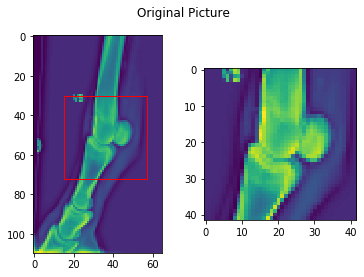

In [0]:
# ORIGINAL
N = 10
rect_true, zoomed_pic = show_zoom_area(labels[N], samples[N])

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Original Picture')
ax1.imshow(samples[N, :, :, 0])
ax1.add_patch(rect_true)
ax2.imshow(zoomed_pic[:, :, 0])
plt.show()

[36 51]
[28 51]
(110, 65, 1)
(110, 65, 1)


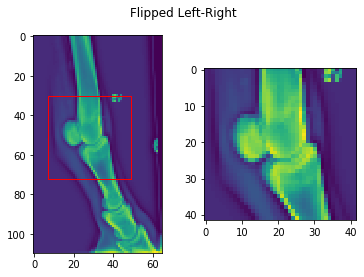

In [0]:
# FLIPPED LEFT-RIGHT
N = 10

n_picture, n_label = flip_picutre_and_coords_lr(samples[N], labels[N])

print(labels[N])
print(n_label)

print(samples[N].shape)
print(n_picture.shape)

rect_true, zoomed_pic = show_zoom_area(n_label, n_picture)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Flipped Left-Right')
ax1.imshow(n_picture[:, :, 0])
ax1.add_patch(rect_true)
ax2.imshow(zoomed_pic[:, :, 0])
plt.show()

[36 51]
[28 59]
(110, 65, 1)
(110, 65, 1)


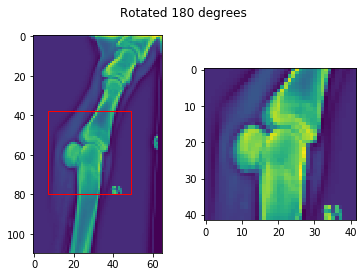

In [0]:
# ROTATED 180 DEGREES
N = 10

n_picture, n_label = rotate_picture_and_coords_180(samples[N], labels[N])

print(labels[N])
print(n_label)

print(samples[N].shape)
print(n_picture.shape)

rect_true, zoomed_pic = show_zoom_area(n_label, n_picture)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Rotated 180 degrees')
ax1.imshow(n_picture[:, :, 0])
ax1.add_patch(rect_true)
ax2.imshow(zoomed_pic[:, :, 0])
plt.show()

[36 51]
[36 59]
(110, 65, 1)
(110, 65, 1)


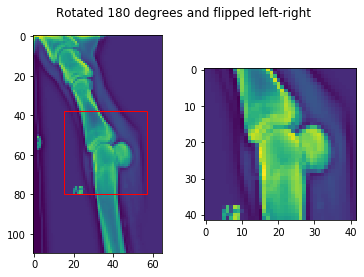

In [0]:
# ROTATED 180 DEGREES and FLIPPED LEFT-RIGHT
N = 10

n_picture, n_label = rotate_picture_and_coords_180_plus_flip_lr(samples[N], labels[N])

print(labels[N])
print(n_label)

print(samples[N].shape)
print(n_picture.shape)

rect_true, zoomed_pic = show_zoom_area(n_label, n_picture)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Rotated 180 degrees and flipped left-right')
ax1.imshow(n_picture[:, :, 0])
ax1.add_patch(rect_true)
ax2.imshow(zoomed_pic[:, :, 0])
plt.show()

In [0]:
# Save healthy pickels:
# Small pictures are first converted from 3 channels to 1 channel.
# Next the x_y coordinates are augmented, to train the localizer.

augmented_healthy_data = []
for sample_data in healthy_samples:
  # Sample_data has the following properties:
  # Col 0 = Big picture | Col 1 = Small picture | Col 2 = X, Y coords | Col 3 = Healthy/Splinter bool
  big_og = sample_data[0]
  xy_og = sample_data[2]
  greyscale_pic = rgb2gray(sample_data[1])
  greyscale_pic = greyscale_pic.reshape(110, 65, 1)

  augmented_healthy_data.append([big_og, greyscale_pic, xy_og, sample_data[3], "Original"])

  big_fliplr = cv2.flip(big_og, 1)
  picture_lr, xy_lr = flip_picutre_and_coords_lr(greyscale_pic, xy_og)

  big_rotate180 = cv2.flip(big_og, -1)
  picture_180, xy_180 = rotate_picture_and_coords_180(greyscale_pic, xy_og)

  big_rotate180_lr = cv2.flip(big_og, 0)
  picture_180lr, xy_180lr = rotate_picture_and_coords_180_plus_flip_lr(greyscale_pic, xy_og)

  augmented_healthy_data.append([big_fliplr, picture_lr, xy_lr, sample_data[3], "Augmented"])
  augmented_healthy_data.append([big_rotate180, picture_180, xy_180, sample_data[3], "Augmented"])
  augmented_healthy_data.append([big_rotate180_lr, picture_180lr, xy_180lr, sample_data[3], "Augmented"])


augmented_healthy_data = np.array(augmented_healthy_data)

(332, 5)


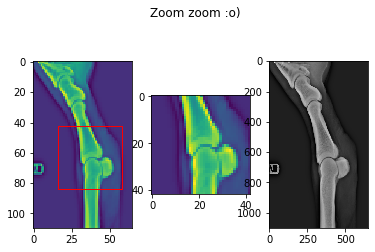

In [0]:
print(augmented_healthy_data.shape)

N = 331
PICTURE_BIG = augmented_healthy_data[N, 0]
PICTURE_X = augmented_healthy_data[N, 1]
LABEL_X = augmented_healthy_data[N, 2]

rect_true, zoomed_pic = show_zoom_area(LABEL_X, PICTURE_X)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Zoom zoom :o)')
ax1.imshow(PICTURE_X[:, :, 0])
ax1.add_patch(rect_true)
ax2.imshow(zoomed_pic[:, :, 0])
ax3.imshow(PICTURE_BIG)
plt.show()

In [0]:
with open('augmented_healthy_data.pickle', 'wb') as handle:
    pickle.dump(augmented_healthy_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
with open("augmented_healthy_data.pickle", 'rb') as handle:
    TEST = pickle.load(handle)

print(TEST.shape)

(332, 5)


In [0]:
# Save Splinter pickels:
# Small pictures are first converted from 3 channels to 1 channel.
# Next the x_y coordinates are augmented, to train the localizer.

augmented_splinter_data = []
for sample_data in splinter_samples:
  # Sample_data has the following properties:
  # Col 0 = Big picture | Col 1 = Small picture | Col 2 = X, Y coords | Col 3 = Healthy/Splinter bool
  big_og = sample_data[0]
  xy_og = sample_data[2]
  greyscale_pic = rgb2gray(sample_data[1])
  greyscale_pic = greyscale_pic.reshape(110, 65, 1)

  augmented_splinter_data.append([big_og, greyscale_pic, xy_og, sample_data[3], "Original"])

  big_fliplr = cv2.flip(big_og, 1)
  picture_lr, xy_lr = flip_picutre_and_coords_lr(greyscale_pic, xy_og)

  big_rotate180 = cv2.flip(big_og, -1)
  picture_180, xy_180 = rotate_picture_and_coords_180(greyscale_pic, xy_og)

  big_rotate180_lr = cv2.flip(big_og, 0)
  picture_180lr, xy_180lr = rotate_picture_and_coords_180_plus_flip_lr(greyscale_pic, xy_og)

  augmented_splinter_data.append([big_fliplr, picture_lr, xy_lr, sample_data[3], "Augmented"])
  augmented_splinter_data.append([big_rotate180, picture_180, xy_180, sample_data[3], "Augmented"])
  augmented_splinter_data.append([big_rotate180_lr, picture_180lr, xy_180lr, sample_data[3], "Augmented"])


augmented_splinter_data = np.array(augmented_splinter_data)

(324, 5)


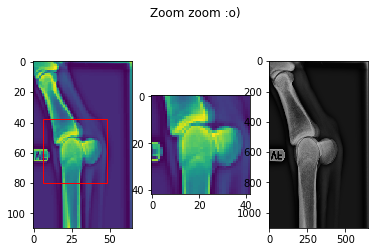

In [0]:
print(augmented_splinter_data.shape)

N = 15
PICTURE_BIG = augmented_splinter_data[N, 0]
PICTURE_X = augmented_splinter_data[N, 1]
LABEL_X = augmented_splinter_data[N, 2]

rect_true, zoomed_pic = show_zoom_area(LABEL_X, PICTURE_X)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Zoom zoom :o)')
ax1.imshow(PICTURE_X[:, :, 0])
ax1.add_patch(rect_true)
ax2.imshow(zoomed_pic[:, :, 0])
ax3.imshow(PICTURE_BIG)
plt.show()

In [0]:
with open('augmented_splinter_data.pickle', 'wb') as handle:
    pickle.dump(augmented_splinter_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
with open("augmented_splinter_data.pickle", 'rb') as handle:
    TEST_S = pickle.load(handle)


(324, 5)
1
Original
